# 1. Initialization

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

d_train = pd.read_csv('Data/train.csv')
d_test = pd.read_csv('Data/test.csv')


# 2. Exploring Data

In [57]:
d_train.head()

# Pclass: A proxy for socio-economic status (SES)
# 1st = Upper  2nd = Middle  3rd = Lower

# Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# SibSp: Number of siblings/spouses aboard. The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored).

# Parch: Number of parents/children aboard. The dataset defines family relations in this way...
# Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.

# Cabin: Cabin number

# Embarked: Port of embarkation. C= Cherbourg, Q= Queenstown, S= Southampton.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# d_train.describe()
# d_train.shape # 891 rows
# d_train.info()
d_test.info()
# d_train.isnull().sum()  # high null counts for Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [59]:
# d_train.PassengerId = d_train.PassengerId.astype('category')
# d_train.Survived = d_train.Survived.astype('category')
# d_train.Pclass = d_train.Pclass.astype('category')
# d_train.Sex = d_train.Sex.astype('category')

# d_test.PassengerId = d_test.PassengerId.astype('category')
# d_test.Pclass = d_test.Pclass.astype('category')
# d_test.Sex = d_test.Sex.astype('category')

# Categorize Age
age_bin = [0, 12, 17, 60, np.inf]  # Age group boundaries
age_bin_lbl = [0, 1, 2, 3] #['child', 'teenager', 'adult', 'elder']  # Age group labels
d_train['AgeGroup'] = pd.cut(d_train.Age, age_bin, labels=age_bin_lbl)
d_test['AgeGroup'] = pd.cut(d_test.Age, age_bin, labels=age_bin_lbl)

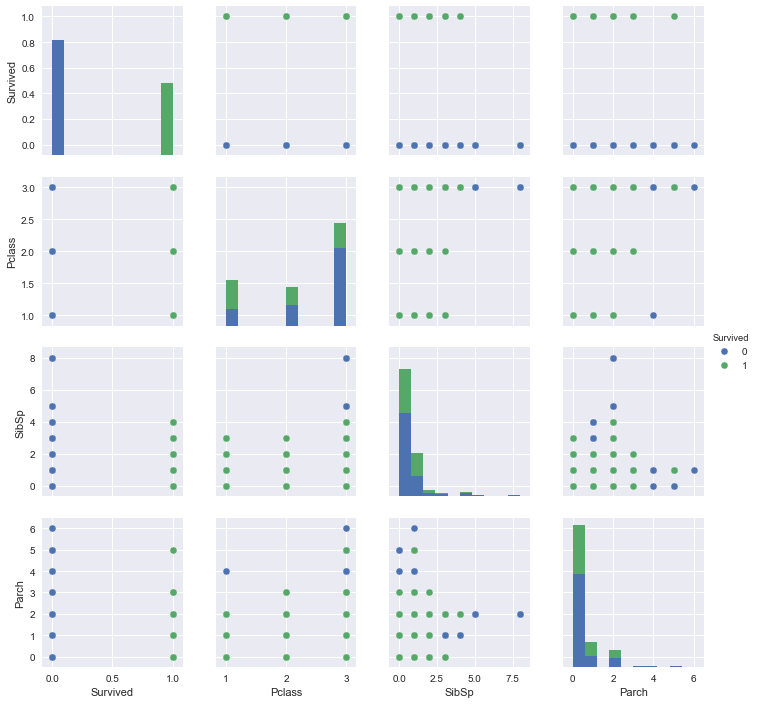

In [100]:
plt.clf()

d_subset = d_train.iloc[:, [1,2,6,7]]
sns.pairplot(d_subset, hue='Survived', size=2.5);

# sns.distplot(d_train.Age.dropna())

# g = sns.FacetGrid(d_train, row='Survived', col='Sex')
# g.map(sns.distplot, 'Age')

# sns.jointplot(data=d_train, x='Age', y='Fare', kind='reg')

# Survival heatmap based on age group and sex
# pivt = d_train.pivot_table(index='AgeGroup', columns='Sex', values='Survived', aggfunc=np.sum)
# sns.heatmap(pivt, annot=True, fmt='.1f')

# Correlation heatmap
# sns.heatmap(d_train.corr(), annot=True, fmt='.2f')

def bar_chart(feature):
    survived = d_train[d_train['Survived']==1][feature].value_counts()
    dead = d_train[d_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True,figsize=(10,5))

# bar_chart('Sex')  
    
plt.show()


# 3. Feature Engineering

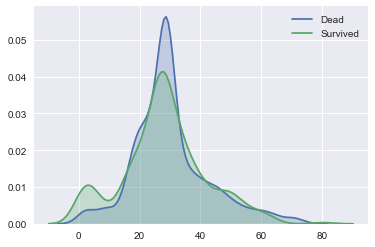

In [60]:
# Replace Age missing value with median of the gender
d_train['Age'].fillna(d_train.groupby('Sex')['Age'].transform('median'), inplace=True)
d_test['Age'].fillna(d_test.groupby('Sex')['Age'].transform('median'), inplace=True)
# Note: recalculate age groups after fillna

sns.kdeplot(d_train[d_train['Survived']==0]['Age'], shade=True, label='Dead')
sns.kdeplot(d_train[d_train['Survived']==1]['Age'], shade=True, label='Survived')
plt.show()


In [61]:
# Categorize Age
age_bin = [0, 12, 17, 60, np.inf]  # Age group boundaries
age_bin_lbl = [0, 1, 2, 3] #['child', 'teenager', 'adult', 'elder']  # Age group labels
d_train['AgeGroup'] = pd.cut(d_train.Age, age_bin, labels=age_bin_lbl)
d_test['AgeGroup'] = pd.cut(d_test.Age, age_bin, labels=age_bin_lbl)

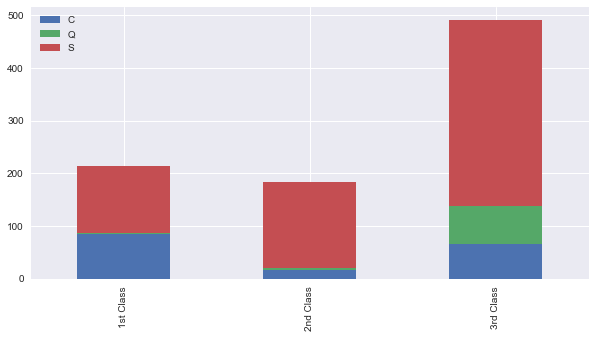

In [62]:
count_embarked_pcls1 = d_train[d_train['Pclass']==1]['Embarked'].value_counts()
count_embarked_pcls2 = d_train[d_train['Pclass']==2]['Embarked'].value_counts()
count_embarked_pcls3 = d_train[d_train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([count_embarked_pcls1,count_embarked_pcls2,count_embarked_pcls3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))
plt.show()

# Fill in na for Embarkation with the majority value S
d_train['Embarked'].fillna('S', inplace=True)
# d_train['Embarked'].fillna('S', inplace=True)

In [63]:
# d_test[d_test['Fare'].isnull()].head()

# Fill in na for Fare based on the mean of Pclass
d_test['Fare'] =d_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

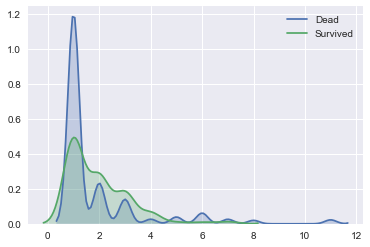

In [64]:
# Combine sibling and parent/child/spouse/sibling in FamilySize
d_train['FamilySize'] = d_train['SibSp'] + d_train['Parch'] + 1
d_test['FamilySize'] = d_test['SibSp'] + d_test['Parch'] + 1

sns.kdeplot(d_train[d_train['Survived']==0]['FamilySize'], shade=True, label='Dead')
sns.kdeplot(d_train[d_train['Survived']==1]['FamilySize'], shade=True, label='Survived')
plt.show()

In [97]:
# Prepare X and Y

df_train = d_train.copy()

df_train = df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin', 'Age'], axis=1)
map_sex = {'female':1,'male':0}
df_train['Sex'] = df_train['Sex'].map(map_sex)

#df_train['Embarked'].drop_duplicates()
map_embark = {'C':0,'Q':1,'S':2}
df_train['Embarked'] = df_train['Embarked'].map(map_embark)

x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
AgeGroup      891 non-null category
FamilySize    891 non-null int64
dtypes: category(1), float64(1), int64(4)
memory usage: 35.9 KB


In [98]:
# Perform feature standardization
from sklearn import preprocessing

x_train['Fare'] = preprocessing.scale(x_train['Fare'])
x_train['FamilySize'] = preprocessing.scale(x_train['FamilySize'])
# plt.hist(x_train['Fare'],10)
# plt.show()

x_train['Pclass'] = x_train['Pclass'].astype('category')
x_train['Sex'] = x_train['Sex'].astype('category')
x_train['Embarked'] = x_train['Embarked'].astype('category')
x_train['AgeGroup'] = x_train['AgeGroup'].astype('category')

d_test['PassengerId'] = d_test['PassengerId'].astype('category')
d_test['Pclass'] = d_test['Pclass'].astype('category')
d_test['Sex'] = d_test['Sex'].astype('category')



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# 4. Model Training

In [99]:
from sklearn import linear_model









,Pclass,Sex,Fare,Embarked,AgeGroup,FamilySize
0,3,0,-0.502445,2,2,0.059160
1,1,1,0.786845,0,2,0.059160
2,3,1,-0.488854,2,2,-0.560975
3,1,1,0.420730,2,2,0.059160
4,3,0,-0.486337,2,2,-0.560975
